# Preprocessing

In [638]:
import pandas as pd

import sys
sys.path.append('../..')


from src.support_encoding import *
from src.support_pre import *
from src.support_plots import * 

Comparando con la iteración anterior, eliminaremos algunas de las VP que tenían un nivel de importancia 0.

In [ ]:
df = pd.read_csv("../../datos/clean_data.csv", index_col = 0)
df.drop(columns=["municipality", "numPhotos", "hasPlan", "newDevelopment", "isParkingSpaceIncludedInPrice", "hasParkingSpace", "has3DTour"], inplace=True)
df.drop(index = df[df["province"] == "Segovia"].index, inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,price,propertyType,size,exterior,rooms,bathrooms,province,municipality,showAddress,distance,hasVideo,status,has360,floor,hasLift
0,550.0,chalet,371.0,False,6,3,Toledo,Numancia de la Sagra,False,40116,False,good,False,unknown,unknown
1,750.0,flat,60.0,True,1,1,Madrid,Madrid,True,7037,False,good,False,3,True
2,750.0,flat,70.0,True,2,1,Madrid,San Sebastián de los Reyes,False,16145,True,good,False,bj,False
3,400.0,penthouse,67.0,True,2,2,Madrid,Villamanrique de Tajo,False,55041,False,good,True,2,False
4,450.0,flat,89.0,False,2,1,Toledo,Recas,False,47186,False,good,False,2,True


In [640]:
df[df.select_dtypes("bool").columns] = df.select_dtypes("bool").astype("str")

In [641]:
df[["rooms", "bathrooms"]] = df[["rooms", "bathrooms"]].astype("str")

In [642]:
num_cols = df.select_dtypes("number").columns
cat_cols = df.select_dtypes("O").columns

df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     434 non-null    float64
 1   size      434 non-null    float64
 2   distance  434 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 10.3 KB


In [643]:
df[cat_cols].head()

,propertyType,exterior,rooms,bathrooms,province,municipality,showAddress,hasVideo,status,has360,floor,hasLift
0,chalet,False,6,3,Toledo,Numancia de la Sagra,False,False,good,False,unknown,unknown
1,flat,True,1,1,Madrid,Madrid,True,False,good,False,3,True
2,flat,True,2,1,Madrid,San Sebastián de los Reyes,False,True,good,False,bj,False
3,penthouse,True,2,2,Madrid,Villamanrique de Tajo,False,False,good,True,2,False
4,flat,False,2,1,Toledo,Recas,False,False,good,False,2,True


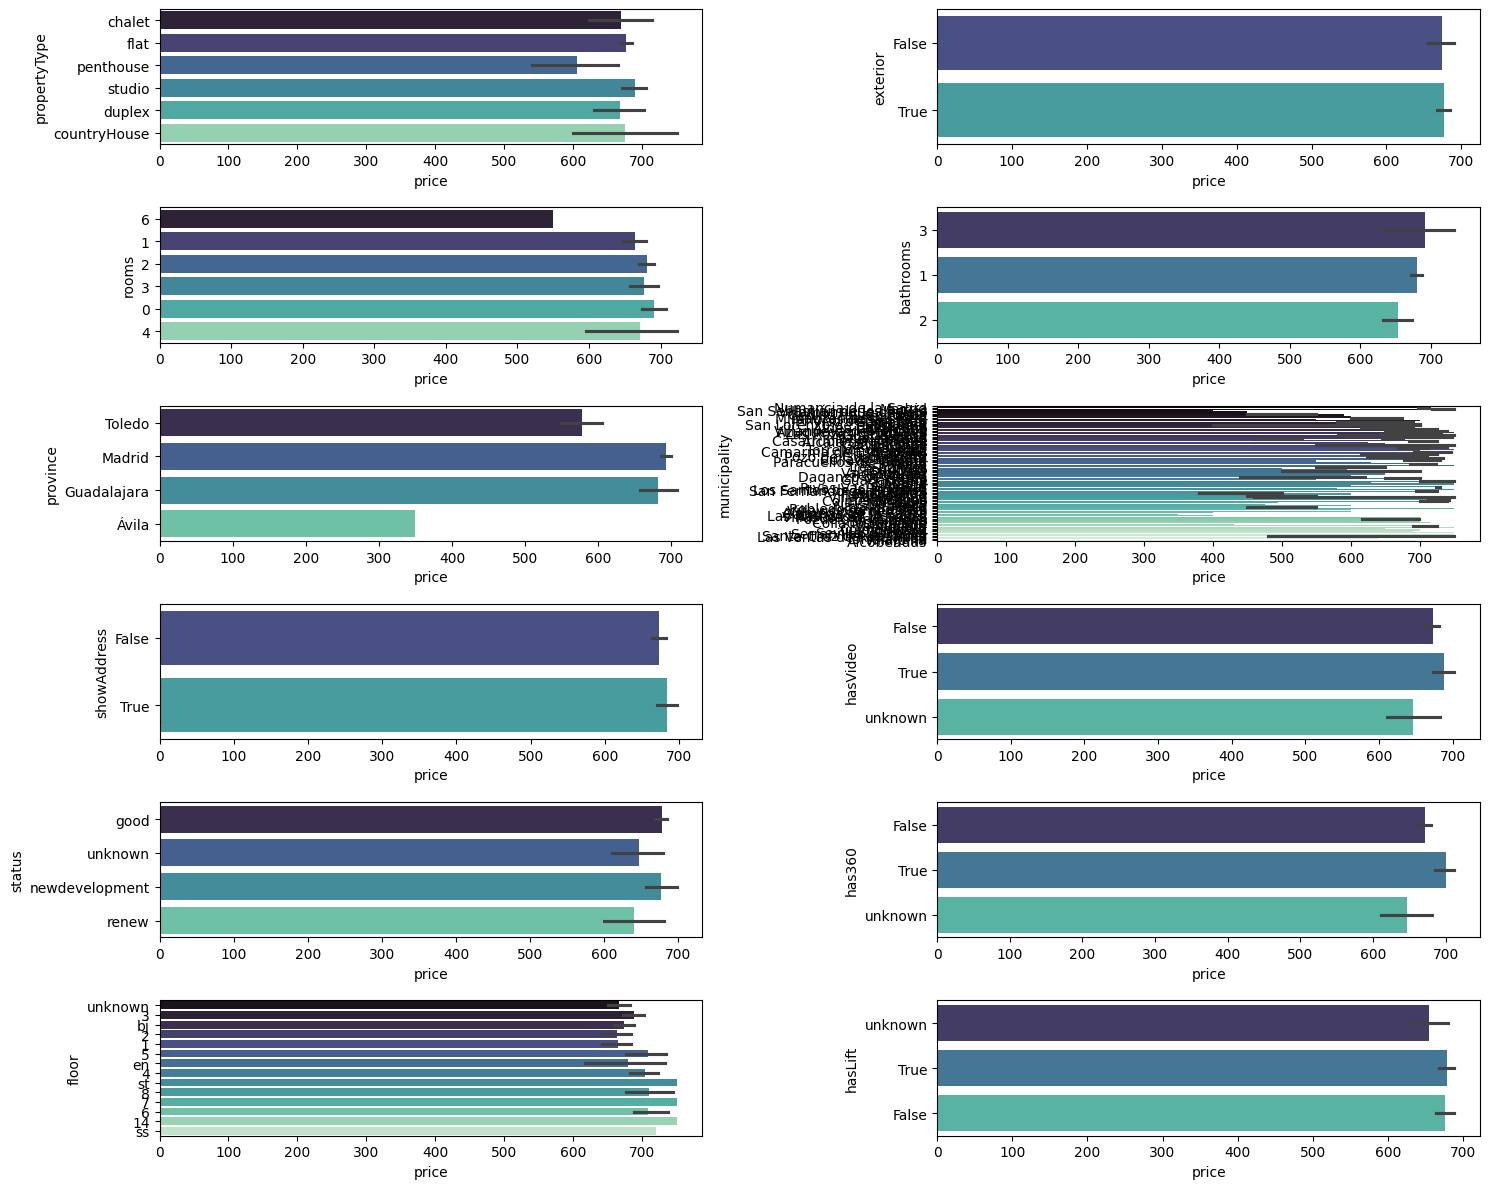

In [644]:
plot_cats(data = df, columns = cat_cols, rv = "price")

In [645]:
# asunciones = Asunciones(dataframe=df, columna_numerica="price")


# for categoria in cat_cols:   

#     print(f"Estamos analizando la variable {categoria.upper()}")
    
#     asunciones.identificar_normalidad(metodo = "shapiro") 

#     # comprobamos la homogeneidad de varianzas
#     asunciones.identificar_homogeneidad(columna_categorica = categoria)

#     # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
#     test = TestEstadisticos(df, "price", categoria)
#     test.run_all_tests()
#     print("\n###########################\n")

In [646]:
cat_cols_ordinal = ["has360", "province", "bathrooms", "rooms", "municipality"]
cat_cols_nominal = cat_cols.drop(cat_cols_ordinal)

#### Encoding

In [647]:
onehot_df, oh_encoder = encode_onehot(df, cat_cols_nominal)

In [648]:
df_w_target, target_encoder = encode_target(df, cat_cols_ordinal, "price")

In [649]:
df_encoded = pd.concat([df_w_target.drop(columns = cat_cols_nominal), onehot_df], axis = 1)
df_encoded.head()

,price,size,rooms,bathrooms,province,municipality,distance,has360,propertyType_chalet,propertyType_countryHouse,...,floor_7,floor_8,floor_bj,floor_en,floor_ss,floor_st,floor_unknown,hasLift_False,hasLift_True,hasLift_unknown
0,550.0,371.0,659.528162,679.027033,579.743213,659.528162,40116,671.176292,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,750.0,60.0,664.363794,680.495726,692.932011,705.594109,7037,671.176292,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,750.0,70.0,681.088234,680.495726,692.932011,687.763912,16145,671.176292,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,400.0,67.0,681.088234,653.853023,692.932011,640.011891,55041,699.901503,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,450.0,89.0,681.088234,680.495726,579.743213,646.517315,47186,671.176292,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Feature Scaling

In [650]:
df_scaled_cols, scaler = scale_data(data = df_encoded, columns = df_encoded.columns.drop(onehot_df.columns).drop("price"), method = "standard")
df_scaled = pd.concat([df_encoded["price"], df_scaled_cols, onehot_df], axis = 1)

In [651]:
df_scaled.head()

,price,size,rooms,bathrooms,province,municipality,distance,has360,propertyType_chalet,propertyType_countryHouse,...,floor_7,floor_8,floor_bj,floor_en,floor_ss,floor_st,floor_unknown,hasLift_False,hasLift_True,hasLift_unknown
0,550.0,8.434820,-1.925467,0.322369,-2.506457,-1.494667,1.127206,-0.457772,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,750.0,-0.216123,-1.365252,0.466782,0.419253,1.036619,-0.887691,-0.457772,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,750.0,0.062042,0.572301,0.466782,0.419253,0.056864,-0.332908,-0.457772,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,400.0,-0.021407,0.572301,-2.152916,0.419253,-2.567070,2.036313,1.976257,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,450.0,0.590557,0.572301,0.466782,-2.506457,-2.209603,1.557852,-0.457772,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Outliers

<Axes: xlabel='price'>

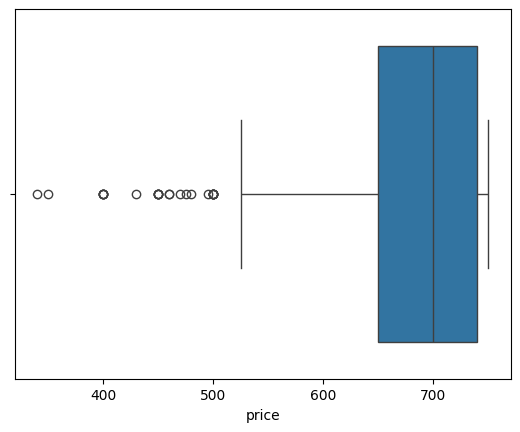

In [652]:
sns.boxplot(df_scaled, x= 'price')

In [653]:
df_outliers, outlier_finder = find_outliers(data = df_scaled, columns=df_scaled.columns, method = "ifo", threshold=60)
df_outliers.head()

100%|██████████| 25/25 [00:15<00:00,  1.59it/s]


,price,size,rooms,bathrooms,province,municipality,distance,has360,propertyType_chalet,propertyType_countryHouse,...,floor_7,floor_8,floor_bj,floor_en,floor_ss,floor_st,floor_unknown,hasLift_False,hasLift_True,hasLift_unknown
0,550.0,8.434820,-1.925467,0.322369,-2.506457,-1.494667,1.127206,-0.457772,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,400.0,-0.021407,0.572301,-2.152916,0.419253,-2.567070,2.036313,1.976257,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,684.0,-0.633371,1.613733,0.466782,0.419253,1.036619,-0.667252,-1.184851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
36,750.0,0.757456,0.099624,-2.152916,-2.506457,-0.429821,0.781715,-1.184851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
66,750.0,-0.911536,-1.365252,0.466782,0.419253,1.036619,-1.069817,-1.184851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [654]:
df_scaled.loc[df_outliers.index, num_cols.drop('price')] = np.nan

In [655]:
df_out_imputed, outlier_imputer = impute_nulls(data=df_scaled)

[IterativeImputer] Completing matrix with shape (434, 42)
[IterativeImputer] Ending imputation round 1/10, elapsed time 5.28
[IterativeImputer] Change: 3.4002737839793555, scaled tolerance: 0.75 
[IterativeImputer] Ending imputation round 2/10, elapsed time 10.34
[IterativeImputer] Change: 0.763543668633526, scaled tolerance: 0.75 
[IterativeImputer] Ending imputation round 3/10, elapsed time 17.70
[IterativeImputer] Change: 0.7044426933667325, scaled tolerance: 0.75 
[IterativeImputer] Early stopping criterion reached.


In [656]:
display(df_scaled[num_cols].describe())
df_out_imputed[num_cols].describe()

,price,size,distance
count,434.000000,409.000000,409.000000
mean,675.910138,-0.075408,-0.033687
std,81.339387,0.744551,0.973970
min,340.000000,-1.328784,-1.287698
25%,650.000000,-0.605554,-0.890128
50%,700.000000,-0.188306,-0.164792
75%,740.000000,0.312391,0.645456
max,750.000000,4.512688,2.298842


,price,size,distance
count,434.000000,434.000000,434.000000
mean,675.910138,-0.038116,-0.006248
std,81.339387,0.789963,0.983105
min,340.000000,-1.328784,-1.287698
25%,650.000000,-0.598600,-0.887631
50%,700.000000,-0.163550,-0.120539
75%,740.000000,0.340208,0.786831
max,750.000000,4.512688,2.298842


<Axes: xlabel='price'>

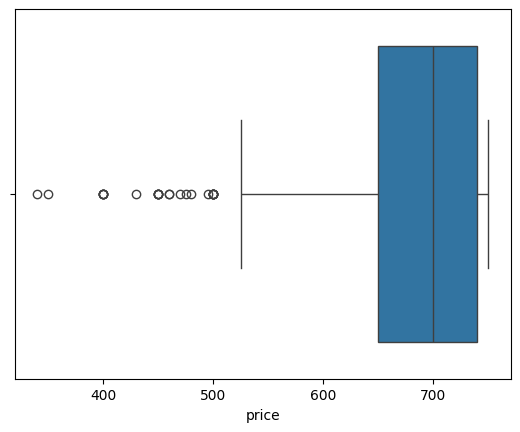

In [657]:
sns.boxplot(df_out_imputed.reset_index(drop = True), x= 'price')

In [658]:
df_out_imputed.to_csv("../../datos/Iteration2/prepped_data.csv")

In [659]:
import pandas as pd

import sys
sys.path.append('../..')

from src.support_model import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

X = df_out_imputed.drop(columns = ["price"])
y = df_out_imputed["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
params_gb = {'n_estimators': [x for x in range(10,90,10)],
            'max_depth': [x for x in range(1,9)],
            'min_samples_split': [x for x in range(5,7)],
            'min_samples_leaf': [x for x in range(5,8)],
            'max_leaf_nodes': [x for x in range(3,6)]}
grid_search_gb = create_model(params=params_gb, X_train=X_train, y_train=y_train, method = GradientBoostingRegressor(random_state=42, learning_rate=0.1), cv = 5)

grid_search_gb.best_params_
gb_estimator = grid_search_gb.best_estimator_
y_test_pred = gb_estimator.predict(X_test)
y_train_pred = gb_estimator.predict(X_train)

display(pd.DataFrame(metricas(y_train, y_train_pred, y_test, y_test_pred)).T)
# plt.figure()
# sns.scatterplot(x = y_train, y = y_train_pred)
# pd.DataFrame(gb_estimator.feature_importances_, index=X.columns, 
#              columns=["Importance"]).sort_values(by = "Importance",ascending=False)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


,r2_score,MAE,MSE,RMSE
train,0.755500,31.043323,1610.334067,40.128968
test,0.679162,34.549095,2125.051046,46.098276


In [660]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

class RegressionModel:
    def __init__(self, X, y, test_size=0.3, random_state=42):
        # División de los datos en entrenamiento y prueba
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        self.model = None
        self.metrics_df = None
        self.best_params = None
        self.random_state = random_state
    
    def _get_model(self, model_type, learning_rate=0.1):
        # Diccionario de modelos disponibles
        models = {
            "linear": LinearRegression(),
            "decision_tree": DecisionTreeRegressor(random_state=self.random_state),
            "random_forest": RandomForestRegressor(random_state=self.random_state),
            "gradient_boosting": GradientBoostingRegressor(random_state=self.random_state, learning_rate=learning_rate),
        }
        if model_type not in models:
            raise ValueError(f"El modelo '{model_type}' no es válido. Elija uno de {list(models.keys())}")
        return models[model_type]

    def train(self, model_type, params=None, learning_rate=0.1):
        # Obtener el modelo seleccionado
        self.model = self._get_model(model_type, learning_rate)
        
        # Si se pasan parámetros, se realiza GridSearch
        if params:
            grid_search = GridSearchCV(self.model, param_grid=params, cv=5, scoring="r2", n_jobs=-1)
            grid_search.fit(self.X_train, self.y_train)
            self.model = grid_search.best_estimator_
            self.best_params = grid_search.best_params_
        
        else:
            self.model.fit(self.X_train, self.y_train)
        
        # Predicciones para las métricas
        y_train_pred = self.model.predict(self.X_train)
        y_test_pred = self.model.predict(self.X_test)

        # Crear un dataframe con las métricas
        self.metrics_df = pd.DataFrame({
            "Train": [
                r2_score(self.y_train, y_train_pred),
                mean_absolute_error(self.y_train, y_train_pred),
                root_mean_squared_error(self.y_train, y_train_pred)
            ],
            "Test": [
                r2_score(self.y_test, y_test_pred),
                mean_absolute_error(self.y_test, y_test_pred),
                root_mean_squared_error(self.y_test, y_test_pred)
            ]
        , }, index=["R2", "MAE", "RMSE"]).T
        
        return self.metrics_df

    def display_metrics(self):
        # Mostrar las métricas si están disponibles
        if self.metrics_df is not None:
            display(self.metrics_df)
        else:
            print("No hay métricas disponibles. Primero entrena el modelo.")
    
    def plot_residuals(self):
        # Verificar que se ha entrenado el modelo
        if self.model is None:
            print("Primero debes entrenar un modelo para graficar los residuos.")
            return
        
        # Predicciones para calcular los residuos
        y_train_pred = self.model.predict(self.X_train)
        y_test_pred = self.model.predict(self.X_test)


        # Crear gráficos de los residuos
        plt.figure(figsize=(12, 6))

        # Residuos de entrenamiento
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=self.y_train, y=y_train_pred, color="blue", alpha=0.6)
        plt.plot([min(self.y_train),max(self.y_train)], [min(y_train_pred), max(y_train_pred)], color = "red", ls = "--")
        plt.title("Train")
        plt.xlabel("Valores Reales")
        plt.ylabel("Valores predichos")

        # Residuos de prueba
        plt.subplot(1, 2, 2)
        sns.scatterplot(x=self.y_test, y=y_test_pred, color="orange", alpha=0.6)
        plt.plot([min(self.y_test),max(self.y_test)], [min(y_test_pred), max(y_test_pred)], color = "red", ls = "--")
        plt.title("Test")
        plt.xlabel("Valores Reales")
        plt.ylabel("Valores predichos")

        plt.tight_layout()
        plt.show()
    
    def get_best_params(self):
        # Obtener los mejores parámetros si se realizaron búsquedas en cuadrícula
        if self.best_params:
            return self.best_params
        else:
            print("No se ha realizado búsqueda en cuadrícula o no hay parámetros disponibles.")
            return None
    def return_model(self):
        return self.model


,R2,MAE,RMSE
Train,0.658713,35.802616,47.410887
Test,0.641076,38.673835,48.757697


{'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 20}


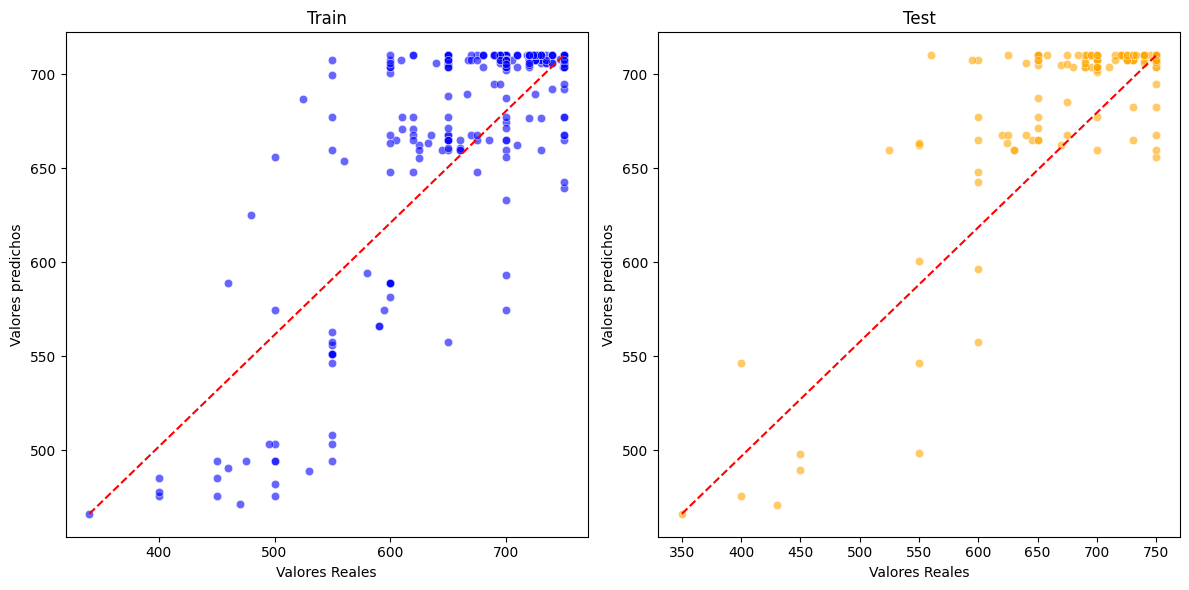

In [661]:
reg_model = RegressionModel(X, y, test_size=0.3, random_state=42)

params_rf = {'n_estimators': [x for x in range(10,90,10)],
            'max_depth': [x for x in range(1,9)],
            'min_samples_split': [x for x in range(3,6)],
            'min_samples_leaf': [x for x in range(3,6)],
            'max_leaf_nodes': [x for x in range(3,6)]}

metrics_rf = reg_model.train("random_forest", params=params_rf)
reg_model.display_metrics()

print(reg_model.get_best_params())
reg_model.plot_residuals()

,R2,MAE,RMSE
Train,0.821244,26.787530,34.312247
Test,0.692839,33.953425,45.105015


{'max_depth': 2, 'max_features': 20, 'max_leaf_nodes': 3, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 70}


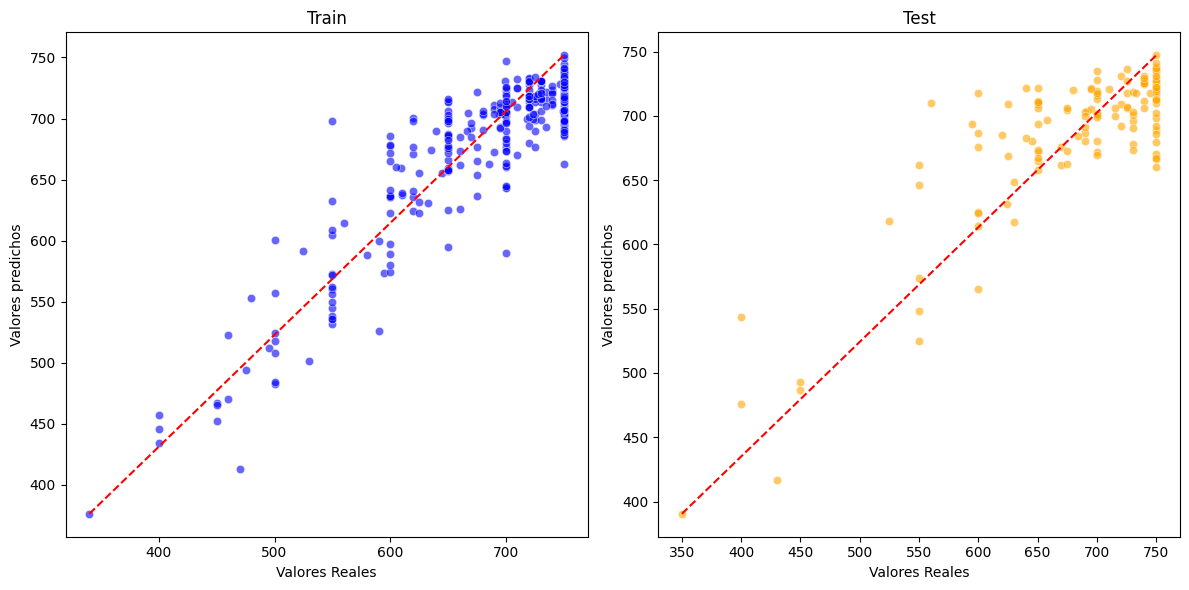

In [ ]:
reg_model = RegressionModel(X, y, test_size=0.3, random_state=42)

params_gb = {'n_estimators': [x for x in range(50,100,10)],
            'max_depth': [x for x in range(1,5)],
            'min_samples_split': [x for x in range(3,7)],
            'min_samples_leaf': [x for x in range(3,7)],
            'max_leaf_nodes': [x for x in range(3,7)], 
            'max_features' : [10,20,40]}

metrics_rf = reg_model.train("gradient_boosting", params=params_gb, learning_rate=0.3)
reg_model.display_metrics()

print(reg_model.get_best_params())
reg_model.plot_residuals()


In [663]:
pd.DataFrame(reg_model.return_model().feature_importances_, index = X.columns, columns=["Importance"]).sort_values(by = "Importance", ascending=False)

,Importance
municipality,0.588619
distance,0.153334
size,0.088999
province,0.043266
floor_unknown,0.028257
rooms,0.023213
hasLift_unknown,0.015971
exterior_False,0.010680
floor_1,0.008767
status_good,0.006477


## Conclusiones

Vemos que seguimos teniendo bastante overfitting. Para la siguiente iteración intentaremos añadir de vuelta alguna de las variables predictoras.